# FLUMINENSE X INTERNACIONAL DATA ANALYSIS

The objective of this analyisis is to work on data of brazilian football match between Fluminense and Internacional, played on 2020 August 15th, and understand how data from the match can explain the result of the match


Find the commented video analysis for this match on my youtube channel, here: https://youtu.be/ngGOW5NOp_I

In [2]:
import http.client
import json

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/teams/league/1396", headers=headers)

res = conn.getresponse()
data = res.read()


team=json.loads(data.decode("utf-8"))
team


{'api': {'results': 20,
  'teams': [{'team_id': 127,
    'name': 'Flamengo',
    'code': None,
    'logo': 'https://media.api-sports.io/football/teams/127.png',
    'country': 'Brazil',
    'is_national': False,
    'founded': 1895,
    'venue_name': 'Estadio Jornalista Mário Filho (Maracanã)',
    'venue_surface': 'grass',
    'venue_address': 'Rua Professor Eurico Rabelo, Maracanã',
    'venue_city': 'Rio de Janeiro, Rio de Janeiro',
    'venue_capacity': 78838},
   {'team_id': 1062,
    'name': 'Atletico-MG',
    'code': None,
    'logo': 'https://media.api-sports.io/football/teams/1062.png',
    'country': 'Brazil',
    'is_national': False,
    'founded': 1908,
    'venue_name': 'Estádio Raimundo Sampaio',
    'venue_surface': 'grass',
    'venue_address': 'Avenida Ismênia Tunes, Bairro Horto',
    'venue_city': 'Belo Horizonte, Minas Gerais',
    'venue_capacity': 23018},
   {'team_id': 120,
    'name': 'Botafogo',
    'code': None,
    'logo': 'https://media.api-sports.io/footba

In [3]:
inter_data = list(filter(lambda p: p['name'] in ['Internacional'],team['api']['teams']))
inter_data

[{'team_id': 119,
  'name': 'Internacional',
  'code': None,
  'logo': 'https://media.api-sports.io/football/teams/119.png',
  'country': 'Brazil',
  'is_national': False,
  'founded': 1909,
  'venue_name': 'Estádio José Pinheiro Borda',
  'venue_surface': 'grass',
  'venue_address': 'Avenida Padre Cacique 891, Bairro Menino Deus',
  'venue_city': 'Porto Alegre, Rio Grande do Sul',
  'venue_capacity': 50128}]

In [1]:
#find last fixture
import http.client
import json
import pandas as pd
import numpy as np

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/fixtures/team/119/last/1", headers=headers)

res = conn.getresponse()
data = res.read()

fix=json.loads(data.decode("utf-8"))
with open('20200817_flu_int_fix.txt','w') as outfile:
    json.dump(fix,outfile)
fix

{'api': {'results': 1,
  'fixtures': [{'fixture_id': 328005,
    'league_id': 1396,
    'league': {'name': 'Serie A',
     'country': 'Brazil',
     'logo': 'https://media.api-sports.io/football/leagues/71.png',
     'flag': 'https://media.api-sports.io/flags/br.svg'},
    'event_date': '2020-08-16T21:00:00+00:00',
    'event_timestamp': 1597611600,
    'firstHalfStart': 1597611600,
    'secondHalfStart': 1597615200,
    'round': 'Regular Season - 3',
    'status': 'Match Finished',
    'statusShort': 'FT',
    'elapsed': 90,
    'venue': 'Estadio do Maracanã',
    'referee': 'Raphael Claus, Brazil',
    'homeTeam': {'team_id': 124,
     'team_name': 'Fluminense',
     'logo': 'https://media.api-sports.io/football/teams/124.png'},
    'awayTeam': {'team_id': 119,
     'team_name': 'Internacional',
     'logo': 'https://media.api-sports.io/football/teams/119.png'},
    'goalsHomeTeam': 2,
    'goalsAwayTeam': 1,
    'score': {'halftime': '1-1',
     'fulltime': '2-1',
     'extratime': 

In [2]:
#Request statistical data from fixture
import http.client

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/statistics/fixture/328005/", headers=headers)

res = conn.getresponse()
data = res.read()

match=json.loads(data.decode("utf-8"))
with open('20200816_flu_int_fixstat.txt','w') as outfile:
    json.dump(fix,outfile)
match

{'api': {'results': 16,
  'statistics': {'Shots on Goal': {'home': '5', 'away': '3'},
   'Shots off Goal': {'home': '2', 'away': '4'},
   'Total Shots': {'home': '10', 'away': '9'},
   'Blocked Shots': {'home': '3', 'away': '2'},
   'Shots insidebox': {'home': '8', 'away': '5'},
   'Shots outsidebox': {'home': '2', 'away': '4'},
   'Fouls': {'home': '13', 'away': '24'},
   'Corner Kicks': {'home': '1', 'away': '4'},
   'Offsides': {'home': '1', 'away': '1'},
   'Ball Possession': {'home': '43%', 'away': '57%'},
   'Yellow Cards': {'home': '2', 'away': '2'},
   'Red Cards': {'home': None, 'away': None},
   'Goalkeeper Saves': {'home': '1', 'away': '3'},
   'Total passes': {'home': '339', 'away': '435'},
   'Passes accurate': {'home': '259', 'away': '339'},
   'Passes %': {'home': '76%', 'away': '78%'}}}}

In [9]:
#Request statistical data from players on fixture
import http.client

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/players/fixture/328005", headers=headers)

res = conn.getresponse()
data = res.read()

match_palyers=json.loads(data.decode("utf-8"))
with open('202000816_flu_int_plrstats.txt','w') as outfile:
    json.dump(match_palyers,outfile)
match_palyers

{'api': {'results': 31,
  'players': [{'event_id': 328005,
    'updateAt': 1597654203,
    'player_id': 41227,
    'player_name': 'Muriel',
    'team_id': 124,
    'team_name': 'Fluminense',
    'number': 27,
    'position': 'G',
    'rating': '6.3',
    'minutes_played': 90,
    'captain': 'False',
    'substitute': 'False',
    'offsides': None,
    'shots': {'total': 0, 'on': 0},
    'goals': {'total': 0, 'conceded': 1, 'assists': 0, 'saves': 1},
    'passes': {'total': 6, 'key': 0, 'accuracy': 42},
    'tackles': {'total': 0, 'blocks': 0, 'interceptions': 0},
    'duels': {'total': 1, 'won': 1},
    'dribbles': {'attempts': 0, 'success': 0, 'past': 0},
    'fouls': {'drawn': 0, 'committed': 0},
    'cards': {'yellow': 0, 'red': 0},
    'penalty': {'won': 0,
     'commited': 0,
     'success': 0,
     'missed': 0,
     'saved': 0}},
   {'event_id': 328005,
    'updateAt': 1597654203,
    'player_id': 10300,
    'player_name': 'Igor Julião',
    'team_id': 124,
    'team_name': 'Flum

In [10]:
times = [fix['api']['fixtures'][0]['homeTeam']['team_name'],fix['api']['fixtures'][0]['awayTeam']['team_name']]
gols = [fix['api']['fixtures'][0]['goalsHomeTeam'],fix['api']['fixtures'][0]['goalsAwayTeam']]
posse = [match['api']['statistics']['Ball Possession']['home'],match['api']['statistics']['Ball Possession']['away']]
chutes = [match['api']['statistics']['Total Shots']['home'],match['api']['statistics']['Total Shots']['away']]
chutes_a_gol = [int(chutes[0])-int(match['api']['statistics']['Shots off Goal']['home'])-int(match['api']['statistics']['Blocked Shots']['home']),
               int(chutes[1])-int(match['api']['statistics']['Shots off Goal']['away'])-int(match['api']['statistics']['Blocked Shots']['away'])]
amarelos = [match['api']['statistics']['Yellow Cards']['home'],match['api']['statistics']['Yellow Cards']['away']]
vermelhos = [match['api']['statistics']['Red Cards']['home'],match['api']['statistics']['Red Cards']['away']]
acerto_passes = [match['api']['statistics']['Passes %']['home'],match['api']['statistics']['Passes %']['away']]
chutes_dentro_area = [match['api']['statistics']['Shots insidebox']['home'],match['api']['statistics']['Shots insidebox']['away']]
chutes_fora_area = [match['api']['statistics']['Shots outsidebox']['home'],match['api']['statistics']['Shots outsidebox']['away']]
faltas = [match['api']['statistics']['Fouls']['home'],match['api']['statistics']['Fouls']['away']]
defesas_goleiro = [match['api']['statistics']['Goalkeeper Saves']['home'],match['api']['statistics']['Goalkeeper Saves']['away']]

In [11]:
geral = pd.DataFrame([gols, posse, chutes, chutes_a_gol, amarelos, vermelhos, acerto_passes,chutes_dentro_area,chutes_fora_area,
                     faltas,defesas_goleiro],
                     index=['Placar','Posse de bola','Chutes','Chutes no gol','Cartões amarelos','Cartões vermelhos','Passes acertados',
                           'Chutes dentro área','Chutes fora área','Faltas','Defesas do goleiro'],
                    columns = times)
print('Visão Geral')
geral

Visão Geral


,Fluminense,Internacional
Placar,2,1
Posse de bola,43%,57%
Chutes,10,9
Chutes no gol,5,3
Cartões amarelos,2,2
Cartões vermelhos,None,None
Passes acertados,76%,78%
Chutes dentro área,8,5
Chutes fora área,2,4
Faltas,13,24


In [12]:
#Players data to dataframe
players_Df = pd.DataFrame(match_palyers['api']['players'])
players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,offsides,shots,goals,passes,tackles,duels,dribbles,fouls,cards,penalty
0,328005,1597654203,41227.0,Muriel,124,Fluminense,27,G,6.3,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 1, 'assists': 0, 'sav...","{'total': 6, 'key': 0, 'accuracy': 42}","{'total': 0, 'blocks': 0, 'interceptions': 0}","{'total': 1, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
1,328005,1597654203,10300.0,Igor Julião,124,Fluminense,21,D,6.3,90,...,NaN,"{'total': 1, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 17, 'key': 1, 'accuracy': 63}","{'total': 2, 'blocks': 1, 'interceptions': 0}","{'total': 11, 'won': 5}","{'attempts': 3, 'success': 1, 'past': 1}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
2,328005,1597654203,10306.0,Nino,124,Fluminense,33,D,6.6,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 0, 'accuracy': 68}","{'total': 1, 'blocks': 1, 'interceptions': 4}","{'total': 17, 'won': 10}","{'attempts': 0, 'success': 0, 'past': 3}","{'drawn': 1, 'committed': 2}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
3,328005,1597654203,61809.0,Luccas Claro,124,Fluminense,4,D,7.5,90,...,NaN,"{'total': 1, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 26, 'key': 0, 'accuracy': 78}","{'total': 3, 'blocks': 1, 'interceptions': 2}","{'total': 11, 'won': 8}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 2, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
4,328005,1597654203,10084.0,Egídio,124,Fluminense,6,D,7.3,90,...,NaN,"{'total': 3, 'on': 2}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 40, 'key': 0, 'accuracy': 81}","{'total': 5, 'blocks': 0, 'interceptions': 0}","{'total': 14, 'won': 11}","{'attempts': 2, 'success': 2, 'past': 1}","{'drawn': 3, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
5,328005,1597654203,51701.0,Michel Araújo,124,Fluminense,15,M,6.6,73,...,NaN,"{'total': 1, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 20, 'key': 0, 'accuracy': 74}","{'total': 0, 'blocks': 0, 'interceptions': 2}","{'total': 10, 'won': 6}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 4, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
6,328005,1597654203,10315.0,Yuri,124,Fluminense,5,M,6.3,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 37, 'key': 0, 'accuracy': 82}","{'total': 2, 'blocks': 0, 'interceptions': 0}","{'total': 12, 'won': 4}","{'attempts': 0, 'success': 0, 'past': 2}","{'drawn': 1, 'committed': 3}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
7,328005,1597654203,10314.0,Douglas Moreira,124,Fluminense,22,M,6.6,90,...,NaN,"{'total': 1, 'on': 1}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 28, 'key': 0, 'accuracy': 87}","{'total': 1, 'blocks': 0, 'interceptions': 3}","{'total': 7, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 1, 'committed': 1}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
8,328005,1597654203,9970.0,Nenê,124,Fluminense,77,F,8.2,83,...,NaN,"{'total': 2, 'on': 2}","{'total': 2, 'conceded': 0, 'assists': 0, 'sav...","{'total': 25, 'key': 1, 'accuracy': 83}","{'total': 0, 'blocks': 0, 'interceptions': 0}","{'total': 7, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 3, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 2, 'misse..."
9,328005,1597654203,152856.0,Evanilson,124,Fluminense,99,F,7.2,89,...,NaN,"{'total': 0,

In [13]:
#Open shots data to columns
shots_Df = pd.DataFrame(players_Df['shots'])
shots_rows = []
for r in range(0,len(shots_Df)):
    shots_rows.append(list(shots_Df.loc[r,'shots'].values()))
    
open_shots = pd.DataFrame(shots_rows,columns=['total shots','on goal'])
n_players_Df = pd.concat([players_Df,open_shots],axis=1)
n_players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,goals,passes,tackles,duels,dribbles,fouls,cards,penalty,total shots,on goal
0,328005,1597654203,41227.0,Muriel,124,Fluminense,27,G,6.3,90,...,"{'total': 0, 'conceded': 1, 'assists': 0, 'sav...","{'total': 6, 'key': 0, 'accuracy': 42}","{'total': 0, 'blocks': 0, 'interceptions': 0}","{'total': 1, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
1,328005,1597654203,10300.0,Igor Julião,124,Fluminense,21,D,6.3,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 17, 'key': 1, 'accuracy': 63}","{'total': 2, 'blocks': 1, 'interceptions': 0}","{'total': 11, 'won': 5}","{'attempts': 3, 'success': 1, 'past': 1}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0
2,328005,1597654203,10306.0,Nino,124,Fluminense,33,D,6.6,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 0, 'accuracy': 68}","{'total': 1, 'blocks': 1, 'interceptions': 4}","{'total': 17, 'won': 10}","{'attempts': 0, 'success': 0, 'past': 3}","{'drawn': 1, 'committed': 2}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
3,328005,1597654203,61809.0,Luccas Claro,124,Fluminense,4,D,7.5,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 26, 'key': 0, 'accuracy': 78}","{'total': 3, 'blocks': 1, 'interceptions': 2}","{'total': 11, 'won': 8}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 2, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0
4,328005,1597654203,10084.0,Egídio,124,Fluminense,6,D,7.3,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 40, 'key': 0, 'accuracy': 81}","{'total': 5, 'blocks': 0, 'interceptions': 0}","{'total': 14, 'won': 11}","{'attempts': 2, 'success': 2, 'past': 1}","{'drawn': 3, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",3,2
5,328005,1597654203,51701.0,Michel Araújo,124,Fluminense,15,M,6.6,73,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 20, 'key': 0, 'accuracy': 74}","{'total': 0, 'blocks': 0, 'interceptions': 2}","{'total': 10, 'won': 6}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 4, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0
6,328005,1597654203,10315.0,Yuri,124,Fluminense,5,M,6.3,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 37, 'key': 0, 'accuracy': 82}","{'total': 2, 'blocks': 0, 'interceptions': 0}","{'total': 12, 'won': 4}","{'attempts': 0, 'success': 0, 'past': 2}","{'drawn': 1, 'committed': 3}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
7,328005,1597654203,10314.0,Douglas Moreira,124,Fluminense,22,M,6.6,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 28, 'key': 0, 'accuracy': 87}","{'total': 1, 'blocks': 0, 'interceptions': 3}","{'total': 7, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 1, 'committed': 1}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,1
8,328005,1597654203,9970.0,Nenê,124,Fluminense,77,F,8.2,83,...,"{'total': 2, 'conceded': 0, 'assists': 0, 'sav...","{'total': 25, 'key': 1, 'accuracy': 83}","{'total': 0, 'blocks': 0, 'interceptions': 0}","{'total': 7, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 3, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 2, 'misse...",2,2
9,328005,1597654203,152856.0,Evanilson,124,Fluminense,99,F,7.2,89,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 14, 'key': 4, 'accuracy': 82}","{'total': 2, 'blocks': 0, 'interceptions': 1}","{'total': 21, 'won': 8}","{'attempts': 3, 'success': 2, 'past': 1}","{'drawn': 4, 'co

In [14]:
time = [fix['api']['fixtures'][0]['homeTeam']['team_name'],fix['api']['fixtures'][0]['awayTeam']['team_name']]
position = list(set(n_players_Df['position']))
shots_position=[]

for p in position:
    shots_aux = []
    for t in time:
        shots_aux.append(n_players_Df[(n_players_Df['position']==p) & (n_players_Df['team_name']==t)]['total shots'].sum())
        
    shots_position.append(shots_aux)

shots_position_df = pd.DataFrame(shots_position, index=position, columns = time)
print('Shots by team and position')
shots_position_df
        
        

Shots by team and position


,Fluminense,Internacional
G,0,0
M,2,4
F,3,4
D,5,1


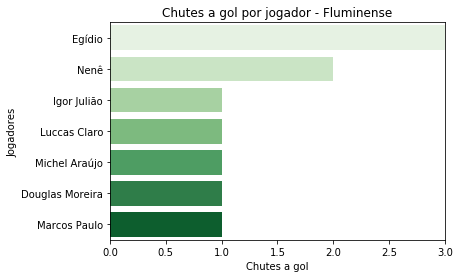

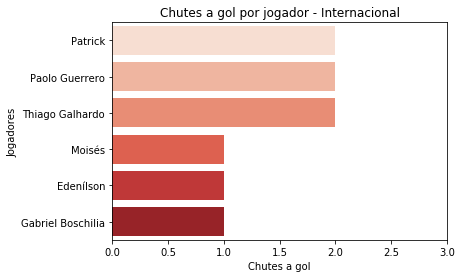

In [17]:
#Total shots by player
import seaborn as sns
import matplotlib.pyplot as plt

home_player_shots=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['homeTeam']['team_name']][['total shots','player_name','team_name']]
home_player_shots = home_player_shots[home_player_shots['total shots']>0].sort_values(by=['total shots'],ascending=False)
home_graph = sns.barplot(x=home_player_shots['total shots'],y=home_player_shots['player_name'],palette='Greens')
home_graph.set(ylabel='Jogadores',xlabel='Chutes a gol',title = 'Chutes a gol por jogador - '+fix['api']['fixtures'][0]['homeTeam']['team_name'])
plt.xlim(0,3)
plt.show()

away_player_shots=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['awayTeam']['team_name']][['total shots','player_name','team_name']]
away_player_shots = away_player_shots[away_player_shots['total shots']>0].sort_values(by=['total shots'],ascending=False)
away_graph = sns.barplot(x=away_player_shots['total shots'],y=away_player_shots['player_name'],palette='Reds')
away_graph.set(ylabel='Jogadores',xlabel='Chutes a gol',title = 'Chutes a gol por jogador - '+fix['api']['fixtures'][0]['awayTeam']['team_name'])
plt.xlim(0,3)
plt.show()


In [18]:
#passes
passes_Df = pd.DataFrame(players_Df['passes'])
passes_rows = []
for r in range(0,len(passes_Df)):
    passes_rows.append(list(passes_Df.loc[r,'passes'].values()))
    
open_passes = pd.DataFrame(passes_rows,columns=['total passes','keys','accuracy'])
n_players_Df = pd.concat([n_players_Df,open_passes],axis=1)
n_players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,duels,dribbles,fouls,cards,penalty,total shots,on goal,total passes,keys,accuracy
0,328005,1597654203,41227.0,Muriel,124,Fluminense,27,G,6.3,90,...,"{'total': 1, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,6,0,42
1,328005,1597654203,10300.0,Igor Julião,124,Fluminense,21,D,6.3,90,...,"{'total': 11, 'won': 5}","{'attempts': 3, 'success': 1, 'past': 1}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,17,1,63
2,328005,1597654203,10306.0,Nino,124,Fluminense,33,D,6.6,90,...,"{'total': 17, 'won': 10}","{'attempts': 0, 'success': 0, 'past': 3}","{'drawn': 1, 'committed': 2}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,22,0,68
3,328005,1597654203,61809.0,Luccas Claro,124,Fluminense,4,D,7.5,90,...,"{'total': 11, 'won': 8}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 2, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,26,0,78
4,328005,1597654203,10084.0,Egídio,124,Fluminense,6,D,7.3,90,...,"{'total': 14, 'won': 11}","{'attempts': 2, 'success': 2, 'past': 1}","{'drawn': 3, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",3,2,40,0,81
5,328005,1597654203,51701.0,Michel Araújo,124,Fluminense,15,M,6.6,73,...,"{'total': 10, 'won': 6}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 4, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,20,0,74
6,328005,1597654203,10315.0,Yuri,124,Fluminense,5,M,6.3,90,...,"{'total': 12, 'won': 4}","{'attempts': 0, 'success': 0, 'past': 2}","{'drawn': 1, 'committed': 3}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,37,0,82
7,328005,1597654203,10314.0,Douglas Moreira,124,Fluminense,22,M,6.6,90,...,"{'total': 7, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 1, 'committed': 1}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,1,28,0,87
8,328005,1597654203,9970.0,Nenê,124,Fluminense,77,F,8.2,83,...,"{'total': 7, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 3, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 2, 'misse...",2,2,25,1,83
9,328005,1597654203,152856.0,Evanilson,124,Fluminense,99,F,7.2,89,...,"{'total': 21, 'won': 8}","{'attempts': 3, 'success': 2, 'past': 1}","{'drawn': 4, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 1, 'commited': 0, 'success': 0, 'misse...",0,0,14,4,82


In [19]:
#passes
time = [fix['api']['fixtures'][0]['homeTeam']['team_name'],fix['api']['fixtures'][0]['awayTeam']['team_name']]
position = list(set(n_players_Df['position']))
columns = ['Home_passes','Home_keys','Home_acc','Away_passes','Away_keys','Away_acc']
passes_position = []

for p in position:
    passes_aux = []
    for t in time:
        passes_aux.append(n_players_Df[(n_players_Df['team_name']==t)& (n_players_Df['position']==p)]['total passes'].sum())
        passes_aux.append(n_players_Df[(n_players_Df['team_name']==t)& (n_players_Df['position']==p)]['keys'].sum())
        
        pass_list=[]
        acc_list=[]
        for i in n_players_Df[(n_players_Df['team_name']==t)& (n_players_Df['position']==p)].index:
            pass_list.append(n_players_Df.loc[i,'total passes'])
            acc_list.append(n_players_Df.loc[i,'accuracy'])
            
        lists = pass_list, acc_list
        passes_aux.append(sum([x * y for x, y in zip(*lists)])/sum(pass_list))
    
    passes_position.append(passes_aux)
    
passes_position_df = pd.DataFrame(passes_position, index=position, columns = columns)
passes_position_df
        

,Home_passes,Home_keys,Home_acc,Away_passes,Away_keys,Away_acc
G,6,0,42.000000,14,0,66.000000
M,90,0,81.944444,130,3,79.330769
F,58,5,78.672414,38,4,72.236842
D,105,1,74.619048,157,0,80.178344


In [20]:
passes_sum = pd.DataFrame([[passes_position_df[columns[0]].sum(),passes_position_df[columns[1]].sum(),passes_position_df[columns[2]].sum(),
                          passes_position_df[columns[3]].sum(),passes_position_df[columns[4]].sum(),passes_position_df[columns[5]].sum()]],
                         index=['Total'],columns = columns)
passes_sum


,Home_passes,Home_keys,Home_acc,Away_passes,Away_keys,Away_acc
Total,259,6,277.235906,339,7,297.745955


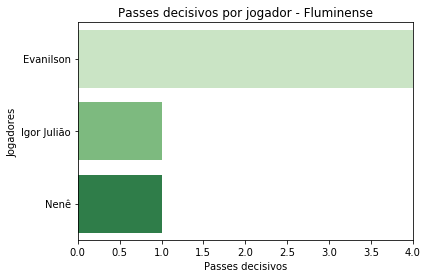

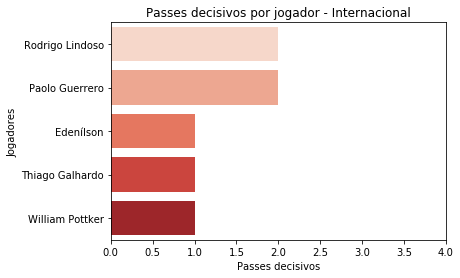

In [23]:
#Key passes by player
home_player_passes=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['homeTeam']['team_name']][['keys','player_name','team_name']]
home_player_passes = home_player_passes[home_player_passes['keys']>0].sort_values(by=['keys'],ascending=False)
home_graph = sns.barplot(x=home_player_passes['keys'],y=home_player_passes['player_name'],palette='Greens')
home_graph.set(ylabel='Jogadores',xlabel='Passes decisivos',title = 'Passes decisivos por jogador - '+fix['api']['fixtures'][0]['homeTeam']['team_name'])
plt.xlim(0,4)
plt.show()

away_player_passes=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['awayTeam']['team_name']][['keys','player_name','team_name']]
away_player_passes = away_player_passes[away_player_passes['keys']>0].sort_values(by=['keys'],ascending=False)
away_graph = sns.barplot(x=away_player_passes['keys'],y=away_player_passes['player_name'],palette='Reds')
away_graph.set(ylabel='Jogadores',xlabel='Passes decisivos',title = 'Passes decisivos por jogador - '+fix['api']['fixtures'][0]['awayTeam']['team_name'])
plt.xlim(0,4)
plt.show()

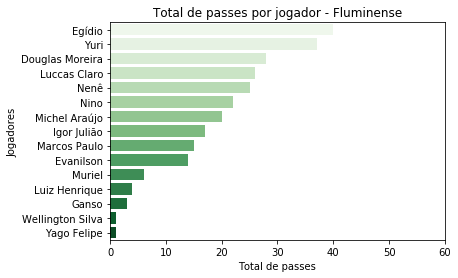

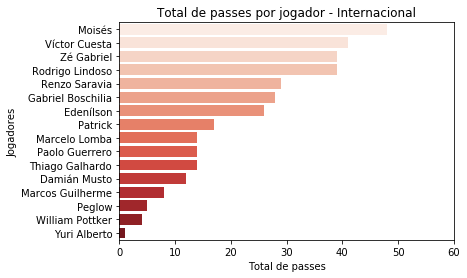

In [30]:
home_player_passes=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['homeTeam']['team_name']][['total passes','player_name','team_name']]
home_player_passes = home_player_passes[home_player_passes['total passes']>0].sort_values(by=['total passes'],ascending=False)
home_graph = sns.barplot(x=home_player_passes['total passes'],y=home_player_passes['player_name'],palette='Greens')
home_graph.set(ylabel='Jogadores',xlabel='Total de passes',title = 'Total de passes por jogador - '+fix['api']['fixtures'][0]['homeTeam']['team_name'])
plt.xlim(0,60)
plt.show()

away_player_passes=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['awayTeam']['team_name']][['total passes','player_name','team_name']]
away_player_passes = away_player_passes[away_player_passes['total passes']>0].sort_values(by=['total passes'],ascending=False)
away_graph = sns.barplot(x=away_player_passes['total passes'],y=away_player_passes['player_name'],palette='Reds')
away_graph.set(ylabel='Jogadores',xlabel='Total de passes',title = 'Total de passes por jogador - '+fix['api']['fixtures'][0]['awayTeam']['team_name'])
plt.xlim(0,60)
plt.show()

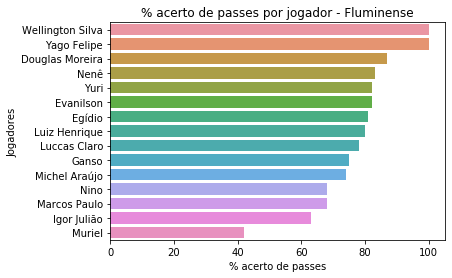

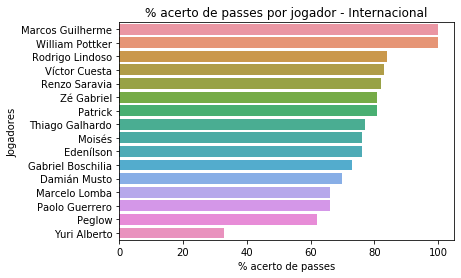

In [25]:
home_player_passes=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['homeTeam']['team_name']][['accuracy','player_name','team_name']]
home_player_passes = home_player_passes[home_player_passes['accuracy']>0].sort_values(by=['accuracy'],ascending=False)
home_graph = sns.barplot(x=home_player_passes['accuracy'],y=home_player_passes['player_name'])
home_graph.set(ylabel='Jogadores',xlabel='% acerto de passes',title = '% acerto de passes por jogador - '+fix['api']['fixtures'][0]['homeTeam']['team_name'])
plt.show()

away_player_passes=n_players_Df[n_players_Df['team_name']==fix['api']['fixtures'][0]['awayTeam']['team_name']][['accuracy','player_name','team_name']]
away_player_passes = away_player_passes[away_player_passes['accuracy']>0].sort_values(by=['accuracy'],ascending=False)
away_graph = sns.barplot(x=away_player_passes['accuracy'],y=away_player_passes['player_name'])
away_graph.set(ylabel='Jogadores',xlabel='% acerto de passes',title = '% acerto de passes por jogador - '+fix['api']['fixtures'][0]['awayTeam']['team_name'])
plt.show()

In [26]:
#tackles
tackles_Df = pd.DataFrame(players_Df['tackles'])
tackles_rows = []
for r in range(0,len(tackles_Df)):
    tackles_rows.append(list(tackles_Df.loc[r,'tackles'].values()))
    
open_tackles = pd.DataFrame(tackles_rows,columns=['Desarmes','bloqueios','interceptações'])
n_players_Df = pd.concat([n_players_Df,open_tackles],axis=1)
n_players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,cards,penalty,total shots,on goal,total passes,keys,accuracy,Desarmes,bloqueios,interceptações
0,328005,1597654203,41227.0,Muriel,124,Fluminense,27,G,6.3,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,6,0,42,0,0,0
1,328005,1597654203,10300.0,Igor Julião,124,Fluminense,21,D,6.3,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,17,1,63,2,1,0
2,328005,1597654203,10306.0,Nino,124,Fluminense,33,D,6.6,90,...,"{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,22,0,68,1,1,4
3,328005,1597654203,61809.0,Luccas Claro,124,Fluminense,4,D,7.5,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,26,0,78,3,1,2
4,328005,1597654203,10084.0,Egídio,124,Fluminense,6,D,7.3,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",3,2,40,0,81,5,0,0
5,328005,1597654203,51701.0,Michel Araújo,124,Fluminense,15,M,6.6,73,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,20,0,74,0,0,2
6,328005,1597654203,10315.0,Yuri,124,Fluminense,5,M,6.3,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,37,0,82,2,0,0
7,328005,1597654203,10314.0,Douglas Moreira,124,Fluminense,22,M,6.6,90,...,"{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,1,28,0,87,1,0,3
8,328005,1597654203,9970.0,Nenê,124,Fluminense,77,F,8.2,83,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 2, 'misse...",2,2,25,1,83,0,0,0
9,328005,1597654203,152856.0,Evanilson,124,Fluminense,99,F,7.2,89,...,"{'yellow': 0, 'red': 0}","{'won': 1, 'commited': 0, 'success': 0, 'misse...",0,0,14,4,82,2,0,1


C:\Users\jefms\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


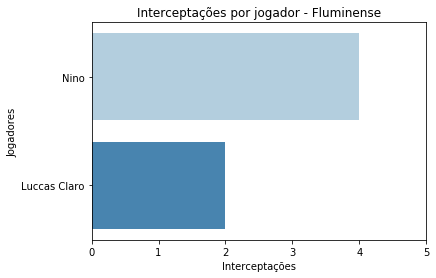

C:\Users\jefms\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


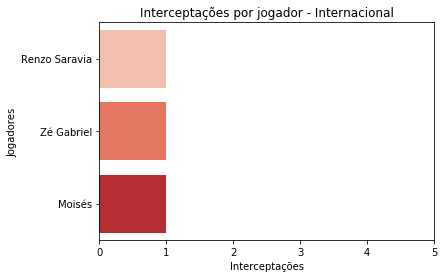

In [28]:
tackles_players = n_players_Df[n_players_Df['position']=='D'][['player_name','team_name','Desarmes', 'bloqueios','interceptações']]
tackles_players

#Tackles by player
home_player_tackles=tackles_players[n_players_Df['team_name']==fix['api']['fixtures'][0]['homeTeam']['team_name']][['player_name','interceptações','team_name']]
home_player_tackles = home_player_tackles[home_player_tackles['interceptações']>0].sort_values(by=['interceptações'],ascending=False)
home_graph = sns.barplot(x=home_player_tackles['interceptações'],y=home_player_tackles['player_name'],palette='Blues')
home_graph.set(ylabel='Jogadores',xlabel='Interceptações',title = 'Interceptações por jogador - '+fix['api']['fixtures'][0]['homeTeam']['team_name'])
plt.xlim(0,5)
plt.show()

away_player_tackles=tackles_players[n_players_Df['team_name']==fix['api']['fixtures'][0]['awayTeam']['team_name']][['player_name','interceptações','team_name']]
away_player_tackles = away_player_tackles[away_player_tackles['interceptações']>0].sort_values(by=['interceptações'],ascending=False)
away_graph = sns.barplot(x=away_player_tackles['interceptações'],y=away_player_tackles['player_name'],palette='Reds')
away_graph.set(ylabel='Jogadores',xlabel='Interceptações',title = 'Interceptações por jogador - '+fix['api']['fixtures'][0]['awayTeam']['team_name'])
plt.xlim(0,5)
plt.show()

In [29]:
tackles_players = n_players_Df[['player_name','position','team_name','Desarmes', 'bloqueios','interceptações']]
tackles_players

,player_name,position,team_name,Desarmes,bloqueios,interceptações
0,Muriel,G,Fluminense,0,0,0
1,Igor Julião,D,Fluminense,2,1,0
2,Nino,D,Fluminense,1,1,4
3,Luccas Claro,D,Fluminense,3,1,2
4,Egídio,D,Fluminense,5,0,0
5,Michel Araújo,M,Fluminense,0,0,2
6,Yuri,M,Fluminense,2,0,0
7,Douglas Moreira,M,Fluminense,1,0,3
8,Nenê,F,Fluminense,0,0,0
9,Evanilson,F,Fluminense,2,0,1
